# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 138 kB 5.2 MB/s eta 0:00:01



In [3]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu117
     |████████████████████████████████| 4.2 MB 7.6 MB/s eta 0:00:01

Note: you may need to restart the kernel to use updated packages.


In [4]:
print(torch.__version__)

1.11.0+cu102


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##

from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0

batch = 64
valid_size = 0.2

# convert data to torch.FloatTensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# choose the training and test datasets
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch,sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch, sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch, num_workers=num_workers)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
### Define transforms
## YOUR CODE HERE ##

#DON'T USE THIS WINDOW

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
## YOUR CODE HERE ##
batch = 64
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch, shuffle=True)


# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch)

####################################################################################
##I'm not sure of correctness what I'm doing here so I didn't use it################# 

train_subset, val_subset = torch.utils.data.random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(1))
train_loader2 = torch.utils.data.DataLoader(train_subset, batch_size=batch, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?


The raw data are images.In order to use neural network models, we need to represent the image data numerically.The ToTensor() function is a correct transform function because it converts image data into tensors. 
Normalizing brings the data to similar scale and help to stabilize the gradient descent step. Normalize() function is appropriate for the normalization operation.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Index: 0
Size: torch.Size([28, 28])
Type image: <class 'torch.Tensor'>
train size: 60000
test size: 10000
Label: 5
3


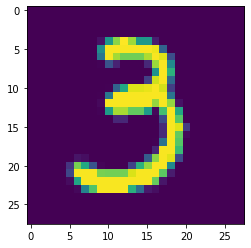

0


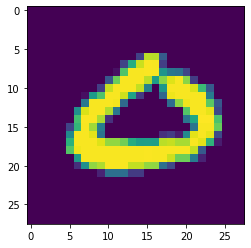

2


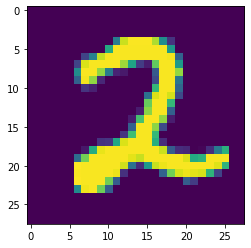

2


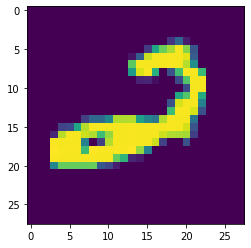

0


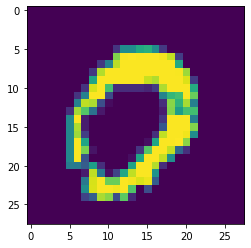

In [4]:
# Explore data
## YOUR CODE HERE ##
#explore the dimensions of data, train size, test size and, using show5 to view examples 
train_features, train_labels = next(iter(train_loader))   
img = train_features[0].squeeze()
label = train_labels[0]

print('Index:', 0)
print(f"Size: {img.size()}")
print(f"Type image: {type(img)}")
print(f"train size: {len(train_data)}")
print(f"test size: {len(test_data)}")
print(f"Label: {label}")
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
## YOUR CODE HERE ##

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.output = F.log_softmax
        self.layer1 = nn.Linear(28 * 28, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 64)
        self.layer5 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.output(self.layer5(x),dim=1)
        return x



# Instantiate the model
net = Net()



Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
## YOUR CODE HERE ##
# Choose an optimizer

optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))


# Choose a loss function
criterion = nn.NLLLoss()

                      
# Instantiate the model
net = Net()

In [7]:
net

Net(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=10, bias=True)
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
## YOUR CODE HERE ##
#i got the codes from here
#https://knowledge.udacity.com/questions/941474
# https://github.com/salamandersen93/udacity_deep_learning_mnist 

train_loss_history = []
val_loss_history = []
epochs =10

for epoch in range(epochs):
    
    train_loss = 0
    train_correct = 0
    train_accuracy = []
    
    for i, (inputs, labels) in enumerate(train_loader):
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        
    train_loss += loss.item()
    train_accuracy.append((preds == labels).sum().item() / preds.size(0) * 100)
        
    train_accuracy_calc = np.mean(train_accuracy)
    train_loss_calc = train_loss/len(train_loader)
    train_loss_history.append(np.mean(train_loss)/len(train_loader))
    
    print(f'Epoch {epoch + 1} train accuracy: {train_accuracy_calc:.2f}% train loss: {train_loss_calc:.5f}') 
    
    val_loss = 0
    val_correct = 0
    val_accuracy = []
    
    for i, (inputs, labels) in enumerate(valid_loader):
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        outputs = net(inputs)
        _, preds = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        
    val_loss += loss.item()
    val_accuracy.append((preds == labels).sum().item() / preds.size(0) * 100)
        
    val_accuracy_calc = np.mean(val_accuracy)
    val_loss_calc = val_loss/len(valid_loader)
    val_loss_history.append(np.mean(val_loss)/len(valid_loader))
    
    print(f'Epoch {epoch + 1} val accuracy: {val_accuracy_calc:.2f}% val loss: {val_loss_calc:.5f}')

Epoch 1 train accuracy: 14.06% train loss: 0.00304
Epoch 1 val accuracy: 9.38% val loss: 0.01228
Epoch 2 train accuracy: 18.75% train loss: 0.00307
Epoch 2 val accuracy: 6.25% val loss: 0.01230
Epoch 3 train accuracy: 12.50% train loss: 0.00305
Epoch 3 val accuracy: 12.50% val loss: 0.01222
Epoch 4 train accuracy: 9.38% train loss: 0.00306
Epoch 4 val accuracy: 15.62% val loss: 0.01220
Epoch 5 train accuracy: 10.94% train loss: 0.00306
Epoch 5 val accuracy: 12.50% val loss: 0.01229
Epoch 6 train accuracy: 10.94% train loss: 0.00307
Epoch 6 val accuracy: 15.62% val loss: 0.01219
Epoch 7 train accuracy: 14.06% train loss: 0.00303
Epoch 7 val accuracy: 9.38% val loss: 0.01230
Epoch 8 train accuracy: 14.06% train loss: 0.00309
Epoch 8 val accuracy: 9.38% val loss: 0.01238
Epoch 9 train accuracy: 6.25% train loss: 0.00308
Epoch 9 val accuracy: 6.25% val loss: 0.01233
Epoch 10 train accuracy: 14.06% train loss: 0.00308
Epoch 10 val accuracy: 6.25% val loss: 0.01233


Plot the training loss (and validation loss/accuracy, if recorded).

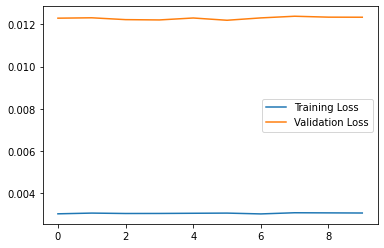

In [11]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

## YOUR CODE HERE ##


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

## YOUR CODE HERE ##
no improve

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##
torch.save(net.state_dict(), 'Project_MNIST.pth')